# WETHER DATASET ANALISYS

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### IMPORT NECESSERY LIBRARY

In [12]:
df = pd.read_csv(r"C:\Users\kgrab\Desktop\Python Jupyte Notebook\small_fast_analisys\Weather Dataset\weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [14]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Importing data set and check basic information

In [15]:
df['DayDate'] = df['Formatted Date'].str[:10]
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,DayDate
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01


### Extracting  Day Date from Formatted Date for grouped function

In [16]:
df_average_day = df.groupby(df['DayDate']).mean(numeric_only=True)
df_average_day.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
DayDate,,,,,,,,
2006-01-01,3.873148,-0.447222,0.818333,21.372750,142.041667,11.112354,0.0,1012.279167
2006-01-02,5.418519,2.042593,0.844583,17.551683,161.958333,8.956967,0.0,1010.131667
2006-01-03,2.319444,0.223843,0.898333,8.417617,248.541667,9.011975,0.0,1020.805000
2006-01-04,2.274074,-0.457407,0.905417,11.579925,46.916667,8.339129,0.0,981.826667
2006-01-05,2.698148,0.256481,0.948333,9.515100,140.375000,4.628750,0.0,935.988333


In [17]:
df_min_day = df.groupby('DayDate').min(numeric_only=True)
df_min_day.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
DayDate,,,,,,,,
2006-01-01,0.577778,-4.050000,0.72,13.9426,134.0,9.9015,0.0,1009.39
2006-01-02,1.694444,-2.683333,0.73,2.4150,106.0,3.9767,0.0,1007.82
2006-01-03,1.666667,-3.116667,0.84,1.7388,108.0,4.4919,0.0,1015.66
2006-01-04,1.666667,-2.738889,0.84,2.9141,0.0,3.8801,0.0,0.00
2006-01-05,1.161111,-3.161111,0.92,2.6887,12.0,2.2057,0.0,0.00


In [18]:
df_max_day = df.groupby('DayDate').max(numeric_only=True)
df_max_day.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
DayDate,,,,,,,,
2006-01-01,7.438889,3.677778,0.89,27.5954,149.0,15.7297,0.0,1016.66
2006-01-02,7.505556,7.044444,0.99,26.8226,239.0,15.6492,0.0,1015.27
2006-01-03,2.900000,2.355556,0.95,20.2216,353.0,11.3183,0.0,1024.44
2006-01-04,2.811111,2.200000,0.96,17.6617,330.0,11.1251,0.0,1025.82
2006-01-05,3.938889,3.288889,1.00,20.5275,345.0,9.9015,0.0,1023.10


### Grouping DataFrame for 3 grouped DataFrams for ploting

In [19]:
df_average_day.reset_index(inplace=True)
df_average_day['DayDate'] = pd.to_datetime(df_average_day['DayDate'])
df_average_day.head()

,DayDate,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-01-01,3.873148,-0.447222,0.818333,21.372750,142.041667,11.112354,0.0,1012.279167
1,2006-01-02,5.418519,2.042593,0.844583,17.551683,161.958333,8.956967,0.0,1010.131667
2,2006-01-03,2.319444,0.223843,0.898333,8.417617,248.541667,9.011975,0.0,1020.805000
3,2006-01-04,2.274074,-0.457407,0.905417,11.579925,46.916667,8.339129,0.0,981.826667
4,2006-01-05,2.698148,0.256481,0.948333,9.515100,140.375000,4.628750,0.0,935.988333


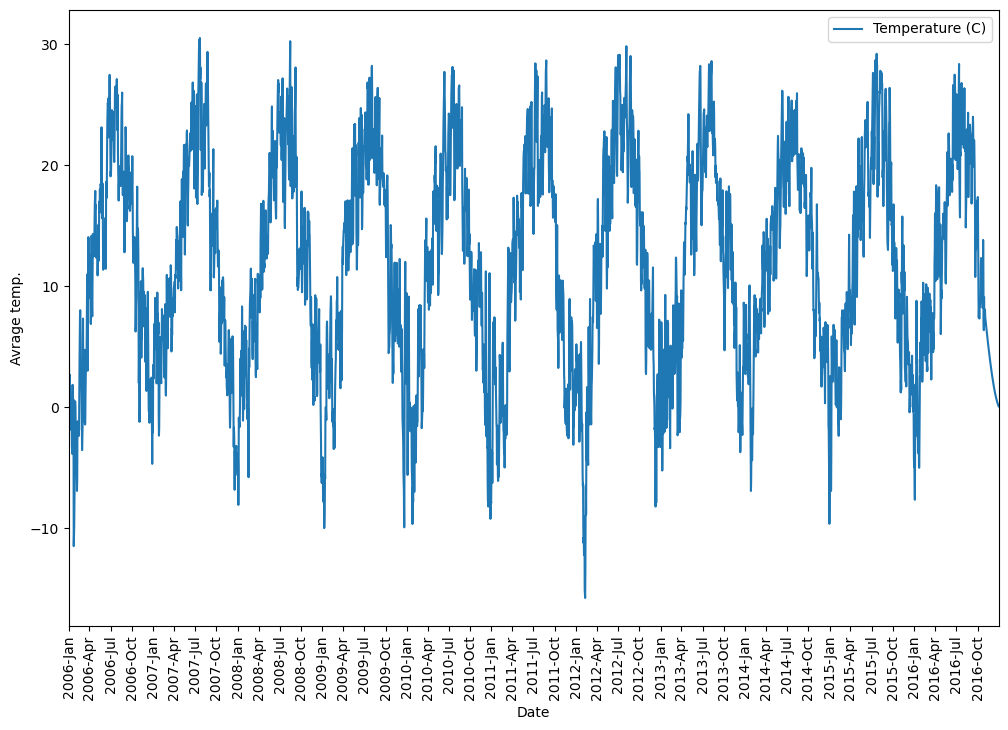

In [ ]:
ax = df_average_day.plot('DayDate','Temperature (C)', figsize = (12,8))

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.xticks(rotation = 90)

plt.ylabel('Avrage temp.')
plt.xlabel('Date')

plt.show()

In [24]:
df_min_day.reset_index(inplace=True)
df_min_day['DayDate'] = pd.to_datetime(df_min_day['DayDate'])
df_min_day.head()

,DayDate,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-01-01,0.577778,-4.050000,0.72,13.9426,134.0,9.9015,0.0,1009.39
1,2006-01-02,1.694444,-2.683333,0.73,2.4150,106.0,3.9767,0.0,1007.82
2,2006-01-03,1.666667,-3.116667,0.84,1.7388,108.0,4.4919,0.0,1015.66
3,2006-01-04,1.666667,-2.738889,0.84,2.9141,0.0,3.8801,0.0,0.00
4,2006-01-05,1.161111,-3.161111,0.92,2.6887,12.0,2.2057,0.0,0.00


In [25]:
df_max_day.reset_index(inplace=True)
df_max_day['DayDate'] = pd.to_datetime(df_max_day['DayDate'])
df_max_day.head()

,DayDate,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-01-01,7.438889,3.677778,0.89,27.5954,149.0,15.7297,0.0,1016.66
1,2006-01-02,7.505556,7.044444,0.99,26.8226,239.0,15.6492,0.0,1015.27
2,2006-01-03,2.900000,2.355556,0.95,20.2216,353.0,11.3183,0.0,1024.44
3,2006-01-04,2.811111,2.200000,0.96,17.6617,330.0,11.1251,0.0,1025.82
4,2006-01-05,3.938889,3.288889,1.00,20.5275,345.0,9.9015,0.0,1023.10


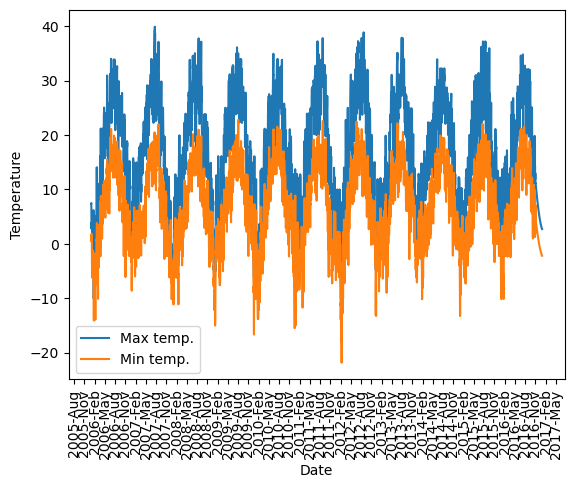

In [29]:
plt.Figure(figsize=(28,8))

plt.plot(df_max_day['DayDate'],df_max_day['Temperature (C)'], label = 'Max temp.')
plt.plot(df_min_day['DayDate'],df_min_day['Temperature (C)'], label = 'Min temp.')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.show()